<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Naive_Bayes%2CLinear_%26_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Naive Bayes

---


Predict whether a user will purchase a product based on demographic features using the Social Network Ads dataset.
1.	Dataset: Download the [Social Network Ads](https://www.kaggle.com/datasets/rakeshrau/social-network-ads/data) Dataset.
2.	Tasks:
  * Load and explore the dataset (inspect features like Age, EstimatedSalary, and Purchased).
  *   Perform preprocessing:
          *   Encode categorical features if necessary.
          *   Apply feature scaling using StandardScaler.

  *   Split the data into training and test sets.
  *   Train a Gaussian Naive Bayes model using sklearn:
          *   First, use default hyperparameters.
          *   Then, train with specific parameter settings for var_smoothing and compare the performance.
  *   Evaluate the model using accuracy, confusion matrix, precision, recall, and F1-score.
  *   Visualize decision boundaries (if possible).


---



**EDA**

In [ ]:
! kaggle datasets download rakeshrau/social-network-ads

Dataset URL: https://www.kaggle.com/datasets/rakeshrau/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip social-network-ads.zip

Archive:  social-network-ads.zip
replace Social_Network_Ads.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df[['Age','EstimatedSalary']].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [ ]:
df.shape

(400, 5)

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [ ]:
X=df.drop(['Purchased','User ID','Gender'],axis=1)
y=df['Purchased']

In [ ]:
ss=StandardScaler()
X=ss.fit_transform(X)

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_pred)}")
print(f"Recall Score:{recall_score(y_test, y_pred)}")
print(f"f1 score:{f1_score(y_test, y_pred)}")

Accuracy: 93.75%
Precision:0.9259259259259259
Recall Score:0.8928571428571429
f1 score:0.9090909090909091


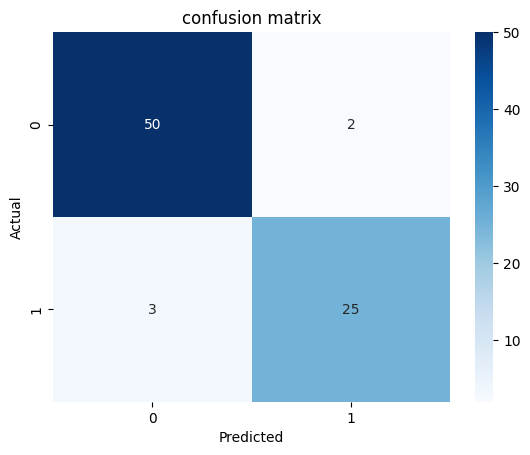

In [ ]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
model_tuned = GaussianNB(var_smoothing=1e-2)
model_tuned.fit(X_train, y_train)

GaussianNB(var_smoothing=0.01)

In [ ]:
y_pred_tuned = model_tuned.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_pred_tuned)}")
print(f"Recall Score:{recall_score(y_test, y_pred_tuned)}")
print(f"f1 score:{f1_score(y_test, y_pred_tuned)}")

Accuracy: 92.50%
Precision:0.9230769230769231
Recall Score:0.8571428571428571
f1 score:0.8888888888888888


<ipython-input-135-7ca16acaf9bb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


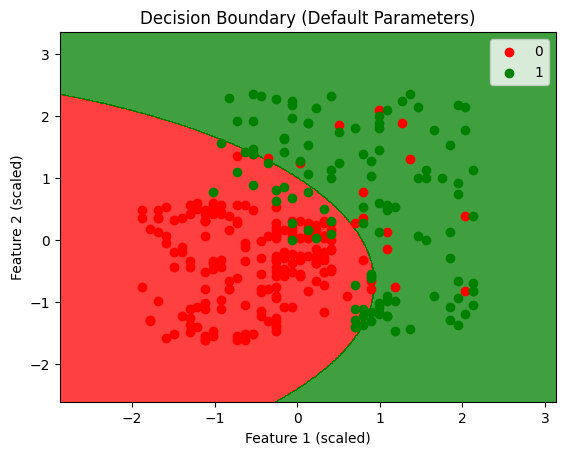

<ipython-input-135-7ca16acaf9bb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


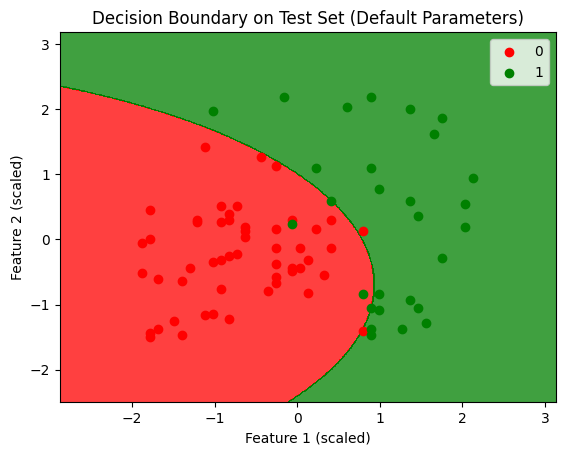

<ipython-input-135-7ca16acaf9bb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


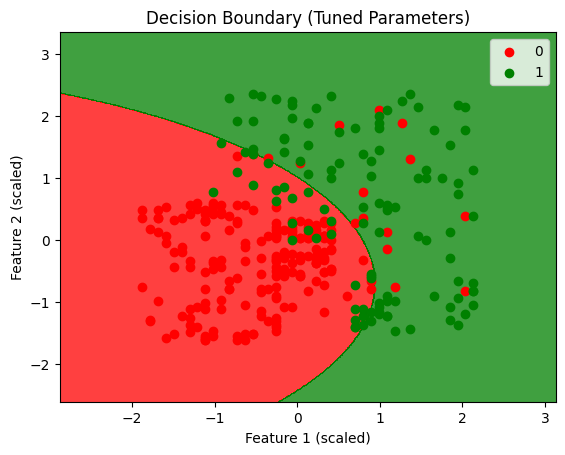

<ipython-input-135-7ca16acaf9bb>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


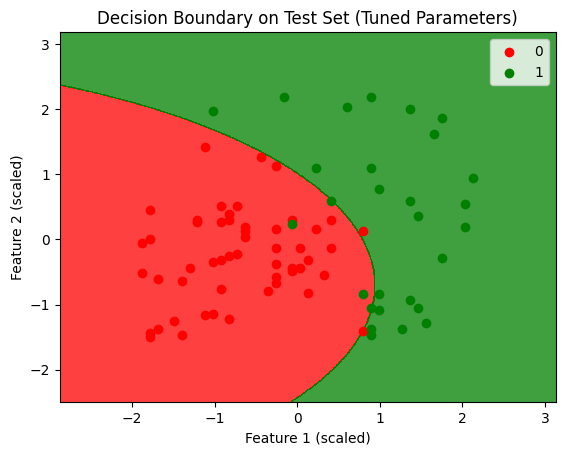

In [ ]:
def plot_decision_boundary(X, y, model, title, feature_indices):
    X_set, y_set = X[:, feature_indices], y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                         np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, model,
                       "Decision Boundary (Default Parameters)", [0, 1])
plot_decision_boundary(X_test, y_test,model,"Decision Boundary on Test Set (Default Parameters)", [0,1])

plot_decision_boundary(X_train, y_train, model_tuned,
                       "Decision Boundary (Tuned Parameters)", [0, 1])
plot_decision_boundary(X_test, y_test, model_tuned,
                       "Decision Boundary on Test Set (Tuned Parameters)", [0, 1])

**Questions:**

**Q1.** Why did we choose Gaussian Naive Bayes instead of Multinomial or Bernoulli Naive Bayes for this dataset?

**Soln:** Gaussian naive bayes is suitable for continuous features as it assumes that the features follow a normal distribution.Whereas multinomial naive bayes is used for count data,such as word frequescies in text classification taska and Bernoulli naive bayes is used for binary of boolean features.Since the dataset has continuous features, Gaussian Naive Bayes is best approach.


---


**Q2.**	What effect does var_smoothing have on the model performance?

**Soln:** The var_smoothing parameter in Gaussian Naive Bayes is used to add a small value to the variance of each feature, which helps to stabilize the calculations by preventing division by zero.


*   Higher var_smoothing values lead to more smoothing, which increases model bias but reduces variance. This can prevent overfitting but might slightly reduce accuracy.
*   Lower var_smoothing values allow the model to fit more closely to the training data, increasing variance and potentially leading to overfitting.



---



**Q3.**	Compare the model's performance using default and custom var_smoothing values. What did you observe?

**Soln:** Model with default parameters performed better than the var_smoothing=1e-2.Precision remained relatively stable, but Recall decreased more noticeably, leading to a slightly lower F1 Score.The slight decrease in performance with higher var_smoothing suggests that the increased smoothing added bias, which impacted the model's ability to correctly identify positive cases.

---



# Part 2: Linear and Multiple Regression

**Linear Regression**

1.	Dataset: Download the [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) Dataset.

2.	Tasks:

  * 	Data Loading and Exploration:
        *   Load the Life Expectancy dataset and inspect its structure.
        *   Display data statistics and handle missing values appropriately.

  * 	Feature Selection:

        *   Choose a single significant feature (such as Adult Mortality) to predict Life Expectancy.
  *   Model Training:
        *   Split the data into training and test sets.
        *   Train a simple Linear Regression model using the selected feature.

  * 	Model Evaluation:
        *	Evaluate the model using metrics such as Mean Squared Error (MSE) and R² score.
        *	Plot the regression line over the data points to visualize the fit.


In [ ]:
! kaggle datasets download kumarajarshi/life-expectancy-who

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
life-expectancy-who.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip life-expectancy-who.zip

Archive:  life-expectancy-who.zip
replace Life Expectancy Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**EDA**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df[['Adult Mortality']].describe()

,Adult Mortality
count,2928.000000
mean,164.796448
std,124.292079
min,1.000000
25%,74.000000
50%,144.000000
75%,228.000000
max,723.000000


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df=df.fillna(df.mean(numeric_only=True))

Text(0.5, 1.0, 'Box Plot of Adult Mortality')

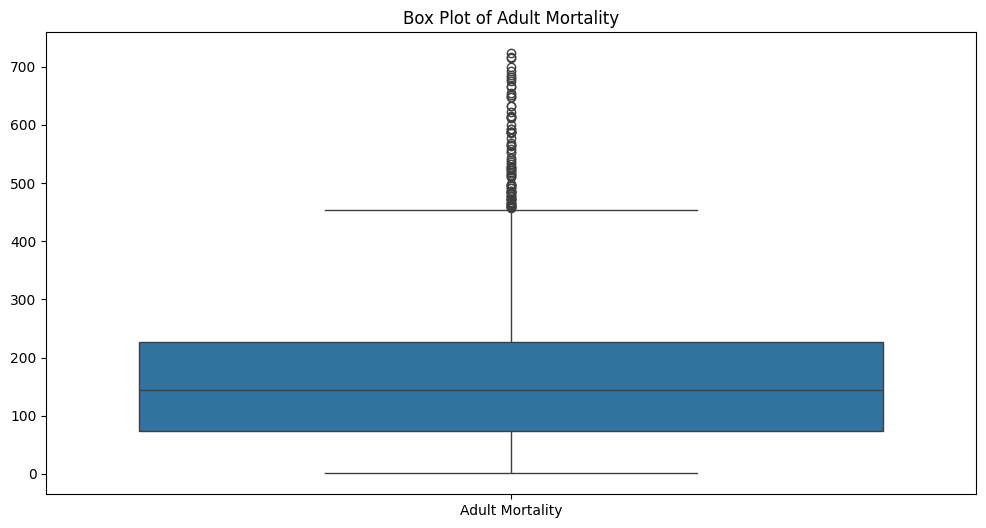

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Adult Mortality']])
plt.title('Box Plot of Adult Mortality')

In [ ]:
Q1 = df['Adult Mortality'].quantile(0.25)
Q3 = df['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Adult Mortality'] < lower_bound) | (df['Adult Mortality'] > upper_bound)]

# the outlier values
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['Adult Mortality']])

Number of outliers detected: 86
      Adult Mortality
345             491.0
346             566.0
347             652.0
348             693.0
349             699.0
...               ...
2932            717.0
2933            723.0
2934            715.0
2936            686.0
2937            665.0

[86 rows x 1 columns]


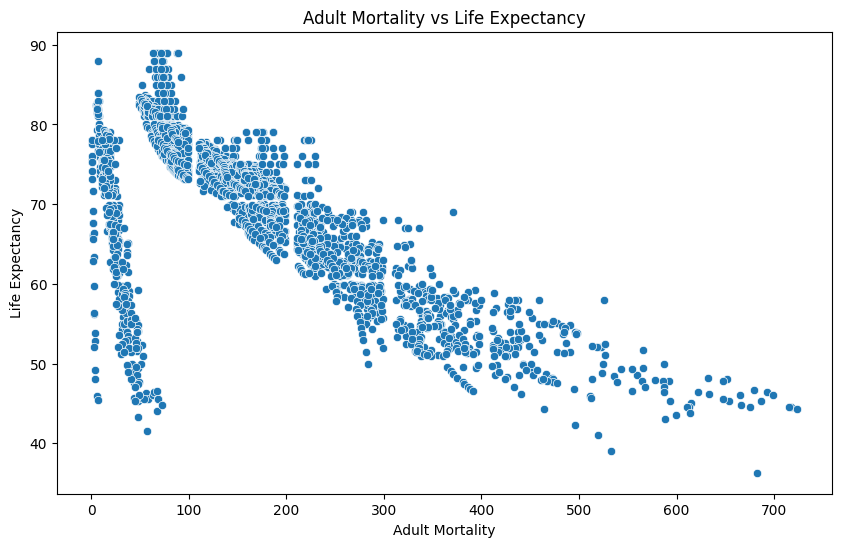

In [ ]:
# Select the feature and target variable
X = df[['Adult Mortality']]
y = df['Life expectancy ']

# Visualize the relationship between the feature and target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Adult Mortality'], y=y)
plt.title('Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**

In [ ]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 47.94363648397692
R2 Score: 0.4466037600916961


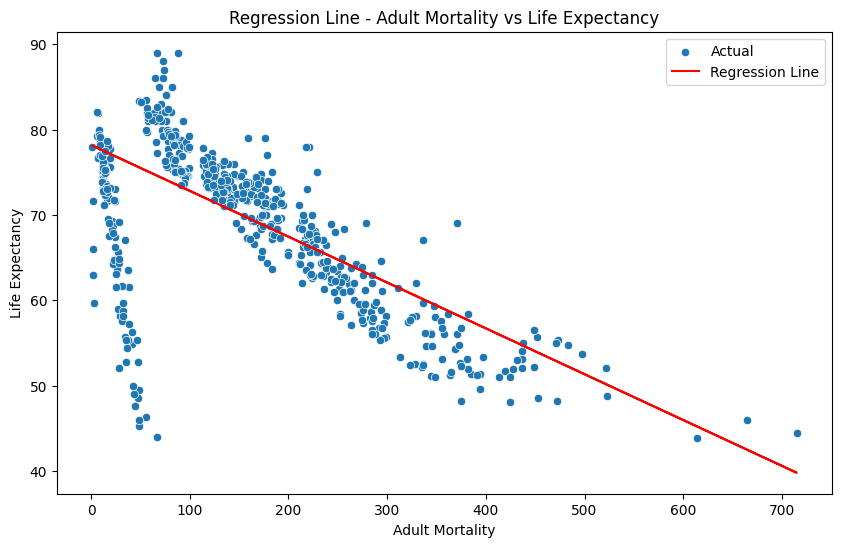

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Adult Mortality'], y=y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression Line - Adult Mortality vs Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

**Questions:**

**Q1.** What does the slope of the regression line indicate in this case?

**Soln:**The slope of the regression line indicates an inverse relationship between adult mortality and life expectancy. Higher mortality rates correspond to lower life expectancy.


---


**Q2.**	How well does the chosen single feature explain the variation in life expectancy?

**Soln:** The R² score of approximately 0.447 shows, adult mortality explains about 44.7% of the variation in life expectancy. This is a moderate level of explanation - significant enough to show that adult mortality is an important factor, but not sufficient to fully predict life expectancy.


---


**Q3.**	What are the limitations of using a single feature for predicting life expectancy?

**Soln:** Limitations are:

*   High MSE (47.94) indicates substantial prediction errors.
*   Other features also have critical effect on life expectancy(eg. status,population,etc).
*   It doesn't capture demographic variations like gender or age group differences.


---


**Q4.**	If you could only choose one feature for prediction, which one would you select and why?

**Soln:** Based on the R² score of 0.447, adult mortality appears to be a reasonable single predictor. Adult mortality is likely a good choice because it directly relates to the measurement of life expectancy and captures various underlying health factors.



---



---



**Multiple Regression**

1.	Tasks:
    *   Feature Selection:
        *   On the same dataset, select multiple features (e.g., GDP, Adult Mortality, BMI, and Schooling) that might impact life expectancy.
    *   Data Preprocessing:

        *   Handle missing values and apply feature scaling if necessary.
        *   Perform one-hot encoding for categorical features (e.g., Status).
    *   Model Training:
        *   Split the data into training and test sets.
        *   Train a Multiple Linear Regression model using LinearRegression from sklearn.
    *   Model Evaluation:
        *   Evaluate the model using metrics like Adjusted R², MSE, and residual plots.


In [ ]:
df=pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
Features=df[['GDP','Population','Adult Mortality',' BMI ','Schooling','Status']]
Target=df['Life expectancy ']

In [ ]:
Features.isnull().sum()

,0
GDP,448
Population,652
Adult Mortality,10
BMI,34
Schooling,163
Status,0


In [ ]:
Features=Features.fillna(Features.mean(numeric_only=True))
Target=Target.fillna(Target.mean(numeric_only=True))

In [ ]:
Features.isnull().sum()

,0
GDP,0
Population,0
Adult Mortality,0
BMI,0
Schooling,0
Status,0


In [ ]:
Target.isnull().sum()

0

In [ ]:
Features=pd.get_dummies(Features,columns=['Status'],drop_first=True)

In [ ]:
Features.head()

,GDP,Population,Adult Mortality,BMI,Schooling,Status_Developing
0,584.259210,33736494.0,263.0,19.1,10.1,True
1,612.696514,327582.0,271.0,18.6,10.0,True
2,631.744976,31731688.0,268.0,18.1,9.9,True
3,669.959000,3696958.0,272.0,17.6,9.8,True
4,63.537231,2978599.0,275.0,17.2,9.5,True


In [ ]:
num_features=Features.select_dtypes(include=['int64','float64']).columns.tolist()
ss=StandardScaler()
Features[num_features]=ss.fit_transform(Features[num_features])

In [ ]:
X=Features
y=Target

In [ ]:
X.head()

,GDP,Population,Adult Mortality,BMI,Schooling,Status_Developing
0,-0.525248,0.389975,0.791586,-0.964715,-0.579931,True
1,-0.523083,-0.230936,0.856072,-0.989810,-0.610570,True
2,-0.521632,0.352715,0.831890,-1.014905,-0.641209,True
3,-0.518723,-0.168315,0.864132,-1.040000,-0.671847,True
4,-0.564893,-0.181666,0.888314,-1.060076,-0.763764,True


**Model Training**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

Mean Squared Error (MSE): 23.06942520518767
R² Score: 0.7337178799596612
Adjusted R² Score: 0.7309679785478849


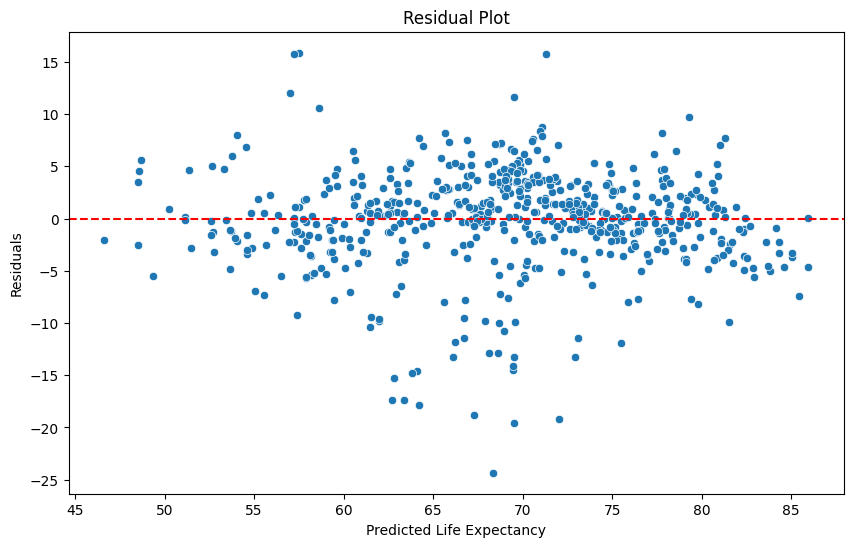

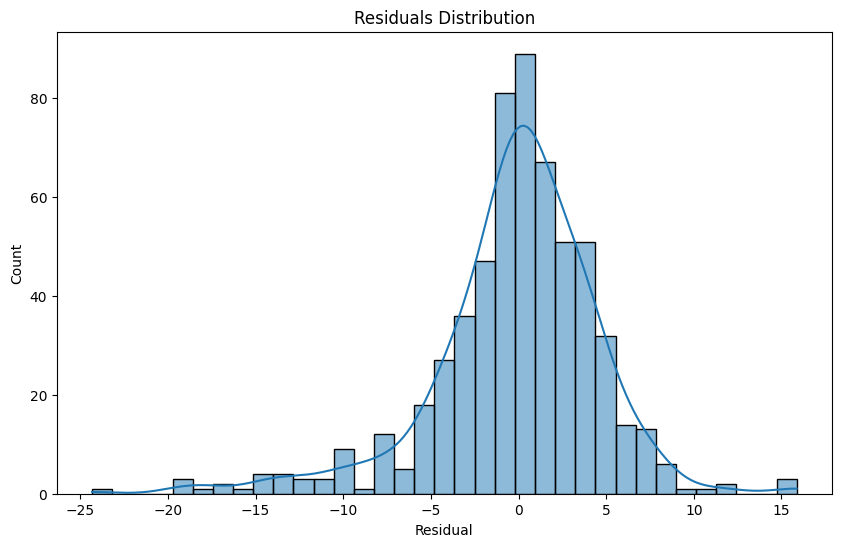

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.show()

In [ ]:
coefficients = pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Model Coefficients:")
print(coefficients)
print(f"Intercept: {model.intercept_}")

Model Coefficients:
                   Coefficient
Schooling             3.563805
 BMI                  1.468373
GDP                   0.623256
Population            0.022039
Status_Developing    -2.082758
Adult Mortality      -4.144460
Intercept: 70.9767618320931


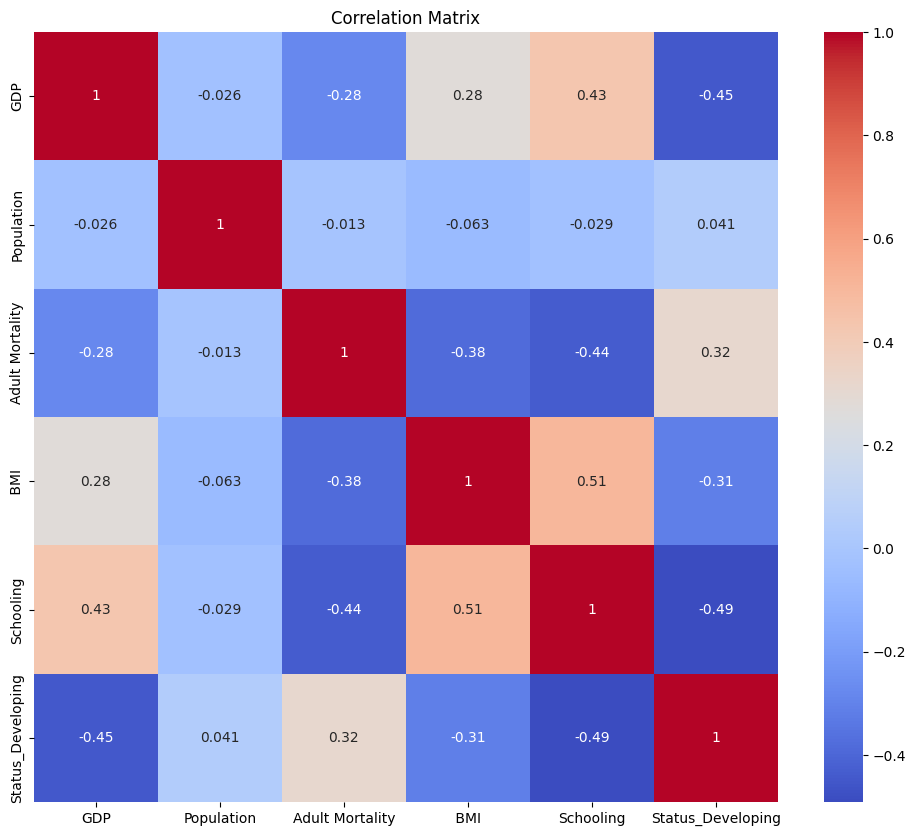

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = Features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Questions:**

  **Q1**.	How does the performance of Multiple Regression compare to Linear Regression?

  **Soln:** Comparison:
  1.   Low MSE indicating much better pridiction accuracy.
  2.   High R² score showing that multiple regression explains about 73% of the variance in life expectancy
  3.  The adjusted R² is very close to the R² score, suggesting that the additional variables in the multiple regression model contribute meaningfully without overfitting


---
**Q2.**	Which features had the highest coefficients, indicating a strong impact on life expectancy?

**Soln:**

*   Adult Mortality has the strongest negative impact.
*   Schooling has the strongest positive impact.

---



**Q3.**	What assumptions does Multiple Linear Regression make? Were any of these assumptions violated?

**Soln:** Multiple linear regression makes several key assumptions:
  
*   Linearity: The relationship between predictors and the outcome is linear.
*   Homoscedasticity: Constant variance of residuals (errors).
*   Normality: Residuals follow a normal distribution.
*   No multicollinearity: Predictors are not highly correlated with each other.

  *In our model:*


*   The residuals appear randomly scattered around zero, indicating no obvious curvature or pattern. This suggests the linearity assumption is not severely violated.
*   The spread of residuals is relatively uniform across the range of predicted values—there’s no clear “funnel” shape.
*   From residual histogram, it is clear that normality is not voilated.
*   As the value of features < 0.8, that means there is no multicollinearity.


---
**Q4.** How can residual plots help identify problems with the model?

**Soln:**
1.   Non-Linearity: If the plot of residuals vs. predicted values shows a clear curve or pattern, it suggests the relationship isn’t purely linear.
2.   Heteroscedasticity: A “cone” or “funnel” shape in the residuals indicates that variance changes with predicted values.
3.  Outliers: Points far from the zero line or far from the rest might be influential outliers.



---




**Q5.**	How would you assess whether there is multicollinearity in the dataset?

**Soln:** We can assess multicollinearity in the dataset using:
  1. Correlation Matrix.
  2. Variance Inflation Factor (VIF).